# A Prediction Model To Predict Songs from Spotify 

## Sarah Mbawa
### 1774392
### University Of Applied Science, Utrecht
### Fundamentals of Machine Learning
### Jonas Moon


Research Question: Will I continue listening to particular songs? My Y variable is listenedTo. i am going to predict that. The X variables = acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, artistName, hour, weekday

### Introduction

Spotify; one of the leading music streaming platforms use recommender systems powered by machine learning algorithms to create personalized playlists for their users (based on listeners’ habits) in other to promote user engagement. Some users also curate their own playlists or listen to the same songs over a period of time. I created a predictive model to predict if I would continue listening to the songs in my playlist over a certain period of time. Will I continue listening to particular songs? If yes, will their audio features(genre), be based on users listening habits? To create this model, I used dataset containing my personal Spotify data with a diverse range of genre(from rap to indie) containing various audio features.


Practical Relevance: using this a person can use this model to identify songs that she would be listening to based on her listening habits.


# Data Collection 

Data was firstly collected by requesting personal Spotify data; this included all the tracks I have listened to over the past six months. I later proceeded to use Spotify API to get more data of these tracks by requesting artists info which contained albums and tracks. This data was boosted with audio features retrieved from the Spotify API. 

The following codes showcase how I used Spotify API to get more data on the recurring artists on my playlists to enrich my personal Spotify data.
A large percentage of this code was copied from Spotipy (a lightweight Python library for the Spotify Web API) (Spotipy, 2020).
 

In [2]:
#Importing relevant library
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
import pandas as pd
import time 
import numpy as np 


In [3]:
#loading my credentials to access Spotify API
client_id = '07d82741d7d342e98223b730817c81d0'
client_secret = '563c6a07c218466f9c7e3383e23e6380'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [4]:
#Defining the chosen artist and search query
name = "{Ian Ewing}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/46NCqFl8vhQZD77y7XkvJs'},
  'href': 'https://api.spotify.com/v1/artists/46NCqFl8vhQZD77y7XkvJs',
  'id': '46NCqFl8vhQZD77y7XkvJs',
  'name': 'goosetaf',
  'type': 'artist',
  'uri': 'spotify:artist:46NCqFl8vhQZD77y7XkvJs'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/6QrRSfwkZsixVIgDRhpToh'},
  'href': 'https://api.spotify.com/v1/artists/6QrRSfwkZsixVIgDRhpToh',
  'id': '6QrRSfwkZsixVIgDRhpToh',
  'name': 'Ian Ewing',
  'type': 'artist',
  'uri': 'spotify:artist:6QrRSfwkZsixVIgDRhpToh'}]

In [5]:
#Extracting the artist's URI 
#(A Spotify URI (Uniform Resource Indicator) is a link that you can find in the Share menu of any track, 
#album, or Artist Profile on Spotify.(Spotify,2020))
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']

In [6]:
#Pulling all of the artist's albums and storing artist's albums' names' and uris in separate lists
sp_albums = sp.artist_albums(artist_uri, album_type='album')

#Storing artist's info in separate lists (Creating a library)
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris


['spotify:album:0rln9PHfiQCWDuR71vSYGh',
 'spotify:album:5lJUqo5mEcYgcCnbADkfvO',
 'spotify:album:38N92gwViVevlXiajN8uvA',
 'spotify:album:2KBslkxEarhsMrvLUq80Wh',
 'spotify:album:6XkXhgoQA6GE1760kbbrNa',
 'spotify:album:2rPogy8i2W4O6W1XAPJXOU',
 'spotify:album:2kU9KxvnqqkQe1DjTmWtOH',
 'spotify:album:7dd1Fsy8gRiDpjufibhC1E']

In [7]:
#Keeping the names and uris in the same order to keep track of duplicated albums
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = []   #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    
    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [8]:
#Printing the songs(tracks) from each album of the artist
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added
    

Album Latibule songs has been added to spotify_albums dictionary
Album Habitual Haze songs has been added to spotify_albums dictionary
Album Momentum songs has been added to spotify_albums dictionary
Album Sugar songs has been added to spotify_albums dictionary
Album Limbo songs has been added to spotify_albums dictionary
Album Cycles songs has been added to spotify_albums dictionary
Album Akemi songs has been added to spotify_albums dictionary
Album hizashi songs has been added to spotify_albums dictionary


In [9]:
spotify_albums

{'spotify:album:0rln9PHfiQCWDuR71vSYGh': {'album': ['Latibule',
   'Latibule',
   'Latibule',
   'Latibule',
   'Latibule',
   'Latibule',
   'Latibule',
   'Latibule'],
  'track_number': [1, 2, 3, 4, 5, 6, 7, 8],
  'id': ['04t7q2jblIxjlQ0PbubW72',
   '2Gt3Svg0Ji2fL4qf1RHEUU',
   '1GsbqL4wq0vNHzx5gvghiF',
   '3nWJuAudhvu13FebClhBhX',
   '5slnZZD9ZhwPW6sySK8w6S',
   '0wDqsATl1klsGFXhRftSCR',
   '2wq3LwsaTUhqlO2cdgwo2C',
   '1VzrjBxs9drfsmkjHU7i8E'],
  'name': ['Windmill City',
   'Silk',
   'Full of Heart',
   'Tree Sap',
   'Tucked Inside',
   'Afternoon Commute',
   'Siren',
   'Somewhere Away'],
  'uri': ['spotify:track:04t7q2jblIxjlQ0PbubW72',
   'spotify:track:2Gt3Svg0Ji2fL4qf1RHEUU',
   'spotify:track:1GsbqL4wq0vNHzx5gvghiF',
   'spotify:track:3nWJuAudhvu13FebClhBhX',
   'spotify:track:5slnZZD9ZhwPW6sySK8w6S',
   'spotify:track:0wDqsATl1klsGFXhRftSCR',
   'spotify:track:2wq3LwsaTUhqlO2cdgwo2C',
   'spotify:track:1VzrjBxs9drfsmkjHU7i8E']},
 'spotify:album:5lJUqo5mEcYgcCnbADkfvO': {

I want to get the genre to determing the types of the songs (tracks) in the album but spotify only give the audio features of the songs. i collected this instead in order to use them as X variables during my prediction 

In [10]:
#creating a function to also get and add the audio features of every song downloaded from ther artists
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [11]:
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 6.2974255084991455 seconds


In [12]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

78

In [13]:
df = pd.DataFrame.from_dict(dic_df)
df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Latibule,1,04t7q2jblIxjlQ0PbubW72,Windmill City,spotify:track:04t7q2jblIxjlQ0PbubW72,0.9490,0.621,0.440,0.8890,0.2020,-13.094,0.0575,138.106,0.454,57
1,Latibule,2,2Gt3Svg0Ji2fL4qf1RHEUU,Silk,spotify:track:2Gt3Svg0Ji2fL4qf1RHEUU,0.8740,0.693,0.369,0.9210,0.1080,-11.476,0.1390,140.061,0.154,56
2,Latibule,3,1GsbqL4wq0vNHzx5gvghiF,Full of Heart,spotify:track:1GsbqL4wq0vNHzx5gvghiF,0.4500,0.803,0.424,0.8470,0.1520,-11.292,0.2210,79.985,0.322,56
3,Latibule,4,3nWJuAudhvu13FebClhBhX,Tree Sap,spotify:track:3nWJuAudhvu13FebClhBhX,0.8280,0.713,0.413,0.8940,0.0982,-11.505,0.0456,150.053,0.662,55
4,Latibule,5,5slnZZD9ZhwPW6sySK8w6S,Tucked Inside,spotify:track:5slnZZD9ZhwPW6sySK8w6S,0.9170,0.714,0.297,0.9140,0.0986,-14.342,0.0894,149.970,0.181,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,hizashi,6,1nHDvLVZjd5Htzf8DXyg87,peace,spotify:track:1nHDvLVZjd5Htzf8DXyg87,0.8450,0.746,0.324,0.2940,0.1880,-11.717,0.2250,155.984,0.518,6
74,hizashi,7,4hsXT7JlTWZHrrADya5Bz1,yoshimitsu,spotify:track:4hsXT7JlTWZHrrADya5Bz1,0.2530,0.834,0.359,0.5400,0.1240,-11.297,0.2810,160.018,0.541,6
75,hizashi,8,4ZlLLeyaQGVX9YydKkIyIC,warrior,spotify:track:4ZlLLeyaQGVX9YydKkIyIC,0.0632,0.776,0.479,0.0819,0.0659,-12.905,0.4140,79.973,0.489,6
76,hizashi,9,1OvOiqnc9MANXhw1SD9nWp,kyoto,spotify:track:1OvOiqnc9MANXhw1SD9nWp,0.7630,0.699,0.572,0.1670,0.1060,-13.649,0.3320,154.057,0.535,6


In [14]:
#printing the albums with their tracks and audio features
print(len(df))
final_df = df.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df))

78
78


In [15]:
final_df.to_csv("Ian Ewing.csv") #saving the data to csv

# Data Cleaning and Pre-processing stage

Reading My Spotify Playlist dataset 

In [16]:
#importing relevant libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [17]:
streamingHistory=pd.read_csv('Streaming History.csv')
streamingHistory

,Unnamed: 0,endTime,artistName,trackName,msPlayed
0,0,2020-05-22 16:40,G Mills,Lilac,160000
1,1,2020-05-22 16:43,G Mills,Haze,183124
2,2,2020-05-22 16:46,Sleepy Fish,The Shore and You,176374
3,3,2020-05-22 16:48,L'Indécis,keep on,140000
4,4,2020-05-22 16:51,Ward Wills,Be Okay,133023
...,...,...,...,...,...
16518,6518,2020-12-04 22:53,Summer Walker,White Tee (with NO1-NOAH),147075
16519,6519,2020-12-04 22:57,The Fray,Never Say Never,254589
16520,6520,2020-12-04 23:01,The Fray,How to Save a Life,236402
16521,6521,2020-12-04 23:06,John Mayer,Your Body Is a Wonderland,246131


In [18]:
#dropping irrelevant columns
streamingHistory.drop(columns='Unnamed: 0', inplace=True)

In [19]:
streamingHistory

,endTime,artistName,trackName,msPlayed
0,2020-05-22 16:40,G Mills,Lilac,160000
1,2020-05-22 16:43,G Mills,Haze,183124
2,2020-05-22 16:46,Sleepy Fish,The Shore and You,176374
3,2020-05-22 16:48,L'Indécis,keep on,140000
4,2020-05-22 16:51,Ward Wills,Be Okay,133023
...,...,...,...,...
16518,2020-12-04 22:53,Summer Walker,White Tee (with NO1-NOAH),147075
16519,2020-12-04 22:57,The Fray,Never Say Never,254589
16520,2020-12-04 23:01,The Fray,How to Save a Life,236402
16521,2020-12-04 23:06,John Mayer,Your Body Is a Wonderland,246131


Reading imported scraped dataset from Spotify API. 

In [20]:
allArtists=pd.read_csv('All Artist Info.csv')
allArtists

,Unnamed: 0,Unnamed: 0.1,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0,0,California Love,1,6ayeqYtOtwVhqVB6k6MKoh,California Love,spotify:track:6ayeqYtOtwVhqVB6k6MKoh,0.03300,0.656,0.882,0.000000,0.6700,-3.011,0.0941,91.661,0.7820,56
1,1,1,California Love,2,1UDsnzBp8gUCFsrzUDlZI9,Slippin' Into Darkness,spotify:track:1UDsnzBp8gUCFsrzUDlZI9,0.04800,0.810,0.642,0.000000,0.2640,-8.647,0.2440,90.956,0.6940,39
2,2,2,California Love,3,3bKs15o7F9VP6GBExCbb6H,Ride or Die,spotify:track:3bKs15o7F9VP6GBExCbb6H,0.11300,0.548,0.590,0.000722,0.2290,-9.301,0.4750,87.841,0.2670,41
3,3,3,California Love,4,4L0iAst3yLonw8aGxTRCvb,I Ain't Mad At Cha,spotify:track:4L0iAst3yLonw8aGxTRCvb,0.05260,0.839,0.657,0.000106,0.3910,-4.959,0.2220,85.111,0.6150,40
4,4,4,California Love,5,66men3J5qFERvIY06M5hQ9,Static II,spotify:track:66men3J5qFERvIY06M5hQ9,0.00944,0.854,0.694,0.071900,0.0767,-4.258,0.1230,104.379,0.7760,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,575,755,Warm Jazz,36,7L0OpOl0dvHuvVq96aqZ0c,Bonfire,spotify:track:7L0OpOl0dvHuvVq96aqZ0c,0.88200,0.452,0.234,0.698000,0.1840,-16.419,0.0351,131.628,0.2100,18
3290,576,756,Warm Jazz,37,4DqIYAMMyFJ5SJyD4wxjtn,Like A Dream,spotify:track:4DqIYAMMyFJ5SJyD4wxjtn,0.85700,0.509,0.265,0.466000,0.1160,-15.503,0.0399,60.754,0.1550,18
3291,577,757,Warm Jazz,38,102Yc1hN6daiOvqlZtbok3,Sounds Familiar,spotify:track:102Yc1hN6daiOvqlZtbok3,0.89400,0.408,0.250,0.029500,0.1500,-17.101,0.0327,138.259,0.1080,18
3292,578,758,Warm Jazz,39,2heUpU5N2ZLzwjeIMk5Vkz,Foot Steps,spotify:track:2heUpU5N2ZLzwjeIMk5Vkz,0.79100,0.320,0.229,0.802000,0.1130,-17.382,0.0334,115.305,0.0838,18


In [21]:
#dropping all irrelevant columns
cols = [0,1]
allArtists.drop(allArtists.columns[cols],axis=1,inplace=True)
allArtists

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,California Love,1,6ayeqYtOtwVhqVB6k6MKoh,California Love,spotify:track:6ayeqYtOtwVhqVB6k6MKoh,0.03300,0.656,0.882,0.000000,0.6700,-3.011,0.0941,91.661,0.7820,56
1,California Love,2,1UDsnzBp8gUCFsrzUDlZI9,Slippin' Into Darkness,spotify:track:1UDsnzBp8gUCFsrzUDlZI9,0.04800,0.810,0.642,0.000000,0.2640,-8.647,0.2440,90.956,0.6940,39
2,California Love,3,3bKs15o7F9VP6GBExCbb6H,Ride or Die,spotify:track:3bKs15o7F9VP6GBExCbb6H,0.11300,0.548,0.590,0.000722,0.2290,-9.301,0.4750,87.841,0.2670,41
3,California Love,4,4L0iAst3yLonw8aGxTRCvb,I Ain't Mad At Cha,spotify:track:4L0iAst3yLonw8aGxTRCvb,0.05260,0.839,0.657,0.000106,0.3910,-4.959,0.2220,85.111,0.6150,40
4,California Love,5,66men3J5qFERvIY06M5hQ9,Static II,spotify:track:66men3J5qFERvIY06M5hQ9,0.00944,0.854,0.694,0.071900,0.0767,-4.258,0.1230,104.379,0.7760,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,Warm Jazz,36,7L0OpOl0dvHuvVq96aqZ0c,Bonfire,spotify:track:7L0OpOl0dvHuvVq96aqZ0c,0.88200,0.452,0.234,0.698000,0.1840,-16.419,0.0351,131.628,0.2100,18
3290,Warm Jazz,37,4DqIYAMMyFJ5SJyD4wxjtn,Like A Dream,spotify:track:4DqIYAMMyFJ5SJyD4wxjtn,0.85700,0.509,0.265,0.466000,0.1160,-15.503,0.0399,60.754,0.1550,18
3291,Warm Jazz,38,102Yc1hN6daiOvqlZtbok3,Sounds Familiar,spotify:track:102Yc1hN6daiOvqlZtbok3,0.89400,0.408,0.250,0.029500,0.1500,-17.101,0.0327,138.259,0.1080,18
3292,Warm Jazz,39,2heUpU5N2ZLzwjeIMk5Vkz,Foot Steps,spotify:track:2heUpU5N2ZLzwjeIMk5Vkz,0.79100,0.320,0.229,0.802000,0.1130,-17.382,0.0334,115.305,0.0838,18


In [22]:
#merging my streaming history dataset from My Spotify Playlist with the all artists dataset from the scraped Spotify API to create a new dataframe. 
final=pd.merge(streamingHistory, allArtists, left_on='trackName', right_on='name')
final

,endTime,artistName,trackName,msPlayed,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,2020-05-22 17:35,xander.,Midnight,185454,Bobby Tarantino II,7,1GtVGc1UYin3zpMUdNSSpM,Midnight,spotify:track:1GtVGc1UYin3zpMUdNSSpM,0.0867,0.568,0.607,0.000000,0.0972,-7.438,0.1080,95.056,0.269,62
1,2020-05-25 11:01,xander.,Midnight,185454,Bobby Tarantino II,7,1GtVGc1UYin3zpMUdNSSpM,Midnight,spotify:track:1GtVGc1UYin3zpMUdNSSpM,0.0867,0.568,0.607,0.000000,0.0972,-7.438,0.1080,95.056,0.269,62
2,2020-07-09 08:34,xander.,Midnight,185454,Bobby Tarantino II,7,1GtVGc1UYin3zpMUdNSSpM,Midnight,spotify:track:1GtVGc1UYin3zpMUdNSSpM,0.0867,0.568,0.607,0.000000,0.0972,-7.438,0.1080,95.056,0.269,62
3,2020-09-14 10:31,xander.,Midnight,185454,Bobby Tarantino II,7,1GtVGc1UYin3zpMUdNSSpM,Midnight,spotify:track:1GtVGc1UYin3zpMUdNSSpM,0.0867,0.568,0.607,0.000000,0.0972,-7.438,0.1080,95.056,0.269,62
4,2020-05-23 07:22,Drake,God's Plan,1557,Scorpion,5,6DCZcSspjsKoFjzjrWoCdn,God's Plan,spotify:track:6DCZcSspjsKoFjzjrWoCdn,0.0332,0.754,0.449,0.000083,0.5520,-9.211,0.1090,77.169,0.357,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,2020-11-13 21:25,Brandy,Best Friend,905,Supermarket (Soundtrack),8,0Uw8pWFNcZwt3wrRPPwp4s,Best Friend,spotify:track:0Uw8pWFNcZwt3wrRPPwp4s,0.0733,0.425,0.460,0.012600,0.1030,-7.381,0.0428,78.539,0.561,45
2837,2020-11-13 21:53,Brandy,Best Friend,205050,Supermarket (Soundtrack),8,0Uw8pWFNcZwt3wrRPPwp4s,Best Friend,spotify:track:0Uw8pWFNcZwt3wrRPPwp4s,0.0733,0.425,0.460,0.012600,0.1030,-7.381,0.0428,78.539,0.561,45
2838,2020-11-13 21:25,Brandy,Baby,97036,The Marshall Mathers LP2 (Deluxe),17,5sGzBBWPe4YC2YoW7lBYph,Baby,spotify:track:5sGzBBWPe4YC2YoW7lBYph,0.5810,0.777,0.890,0.000000,0.1080,-5.066,0.3430,93.861,0.829,48
2839,2020-11-13 21:25,Brandy,Baby,97036,Supermarket (Soundtrack),6,4NQNuItFMPClEJNCceGdF3,Baby,spotify:track:4NQNuItFMPClEJNCceGdF3,0.2290,0.682,0.755,0.000000,0.0966,-4.436,0.0488,95.998,0.197,48


Dropping all duplicate values in order to create the final dataframe which would be further processed for the predictive model in the machine learning aspect. After all the data cleaning, the resulting dataframe is now 215 rows by 20 columns. This will be enough to provide variables for X. 

In [23]:
final.drop_duplicates(subset='trackName').reset_index()

,index,endTime,artistName,trackName,msPlayed,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0,2020-05-22 17:35,xander.,Midnight,185454,Bobby Tarantino II,7,1GtVGc1UYin3zpMUdNSSpM,Midnight,spotify:track:1GtVGc1UYin3zpMUdNSSpM,0.0867,0.568,0.607,0.000000,0.0972,-7.438,0.1080,95.056,0.269,62
1,4,2020-05-23 07:22,Drake,God's Plan,1557,Scorpion,5,6DCZcSspjsKoFjzjrWoCdn,God's Plan,spotify:track:6DCZcSspjsKoFjzjrWoCdn,0.0332,0.754,0.449,0.000083,0.5520,-9.211,0.1090,77.169,0.357,86
2,20,2020-05-23 07:53,The Weeknd,Sidewalks,231360,Starboy,9,4h90qkbnW1Qq6pBhoPvwko,Sidewalks,spotify:track:4h90qkbnW1Qq6pBhoPvwko,0.1470,0.542,0.720,0.000000,0.3480,-5.136,0.0628,149.828,0.623,72
3,62,2020-05-23 08:15,JAY-Z,Holy Grail,315210,Magna Carta... Holy Grail,1,37jTPJgwCCmIGMPB45jrPV,Holy Grail,spotify:track:37jTPJgwCCmIGMPB45jrPV,0.0594,0.676,0.534,0.000009,0.2560,-6.901,0.0831,145.082,0.156,65
4,86,2020-05-23 08:15,Justin Timberlake,What Goes Around.../...Comes Around (Interlude),1300,FutureSex/LoveSounds,6,3pD0f7hSJg2XdQ6udw5Tey,What Goes Around.../...Comes Around (Interlude),spotify:track:3pD0f7hSJg2XdQ6udw5Tey,0.1220,0.687,0.723,0.001020,0.5730,-4.751,0.0709,76.000,0.432,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2832,2020-11-07 22:52,The Notorious B.I.G.,Long Kiss Goodnight - 2014 Remaster,2551,Life After Death (2014 Remastered Edition),23,2fw0DgUc8GTNxZ2BAv9Fih,Long Kiss Goodnight - 2014 Remaster,spotify:track:2fw0DgUc8GTNxZ2BAv9Fih,0.0962,0.479,0.892,0.000000,0.3730,-4.952,0.4280,171.397,0.348,50
211,2833,2020-11-08 09:37,Backstreet Boys,Back to Your Heart,12205,Millennium,9,0rVPrbLlFgLtJWd31gM5Cw,Back to Your Heart,spotify:track:0rVPrbLlFgLtJWd31gM5Cw,0.2310,0.649,0.429,0.000000,0.1640,-7.430,0.0239,92.011,0.243,49
212,2836,2020-11-13 21:25,Brandy,Best Friend,905,Supermarket (Soundtrack),8,0Uw8pWFNcZwt3wrRPPwp4s,Best Friend,spotify:track:0Uw8pWFNcZwt3wrRPPwp4s,0.0733,0.425,0.460,0.012600,0.1030,-7.381,0.0428,78.539,0.561,45
213,2838,2020-11-13 21:25,Brandy,Baby,97036,The Marshall Mathers LP2 (Deluxe),17,5sGzBBWPe4YC2YoW7lBYph,Baby,spotify:track:5sGzBBWPe4YC2YoW7lBYph,0.5810,0.777,0.890,0.000000,0.1080,-5.066,0.3430,93.861,0.829,48


# Feature Engineering and Decriptive Analysis

### Transformations
In this section, i transformed the endTime to days and hours to get accurate days and times which I listen to songs on Spotify.
The final dataset was augmented by transforming the milliseconds played to minutes played and also calculated the total hours for which all the songs in the playlist were played (519.33 minutes). I also analysed the top 15 artists and songs featured in my spotify playlist. I seperated the days, hours and minPlayed columns from the main dataset and then pivoted the df and creating another one. This allowed me to transform and reshape the datetime variables into ('hour','weekday','minplayed') to multi-index identify the hours per weekday for which i listened to songs taking the minplayed as counts.

### Streaming History visualization
I used graphs such as barchart and heatmap to identify and visualize the most common listening hours and days per streams. 
I also visualized the distribuition of music listened to per months from June 2020 to December 2020. 

All of this wan doen to get an in depth knowkledge of my dataset and to also transform it for accurate prediction.


In [24]:
#creating a copy of the streaming history dataset from My Spotify playlist for transformation
streamingHistory_visual=streamingHistory.copy()

In [25]:
streamingHistory_visual

,endTime,artistName,trackName,msPlayed
0,2020-05-22 16:40,G Mills,Lilac,160000
1,2020-05-22 16:43,G Mills,Haze,183124
2,2020-05-22 16:46,Sleepy Fish,The Shore and You,176374
3,2020-05-22 16:48,L'Indécis,keep on,140000
4,2020-05-22 16:51,Ward Wills,Be Okay,133023
...,...,...,...,...
16518,2020-12-04 22:53,Summer Walker,White Tee (with NO1-NOAH),147075
16519,2020-12-04 22:57,The Fray,Never Say Never,254589
16520,2020-12-04 23:01,The Fray,How to Save a Life,236402
16521,2020-12-04 23:06,John Mayer,Your Body Is a Wonderland,246131


Converting the msPlayed column variable to minutes played (minPlayed) using the mathematics equation to convert Milliseconds to Minutes. The time in minutes is equal to the milliseconds divided by 60,000.

In [26]:
### minutes played for each song.
streamingHistory_visual['minPlayed'] = streamingHistory.msPlayed / 60000
streamingHistory_visual.drop(columns='msPlayed', inplace = True)
streamingHistory_visual

,endTime,artistName,trackName,minPlayed
0,2020-05-22 16:40,G Mills,Lilac,2.666667
1,2020-05-22 16:43,G Mills,Haze,3.052067
2,2020-05-22 16:46,Sleepy Fish,The Shore and You,2.939567
3,2020-05-22 16:48,L'Indécis,keep on,2.333333
4,2020-05-22 16:51,Ward Wills,Be Okay,2.217050
...,...,...,...,...
16518,2020-12-04 22:53,Summer Walker,White Tee (with NO1-NOAH),2.451250
16519,2020-12-04 22:57,The Fray,Never Say Never,4.243150
16520,2020-12-04 23:01,The Fray,How to Save a Life,3.940033
16521,2020-12-04 23:06,John Mayer,Your Body Is a Wonderland,4.102183


In [27]:
#Calculating the total hours for which all the songs in the playlist were played. 
streamingHistory_visual.minPlayed.sum()/60

519.3130302777778

In [28]:
#identifying the top 15 artists featured in my spotify playlist
top15_artists = streamingHistory_visual.artistName.value_counts()[:15]
top15_artists

Eminem               534
Logic                412
Linkin Park          369
Daft Punk            281
Justin Timberlake    276
Maroon 5             240
2Pac                 197
JAY-Z                192
The Weeknd           188
Backstreet Boys      179
50 Cent              176
Kanye West           154
Drake                153
Snoop Dogg           151
Kendrick Lamar       146
Name: artistName, dtype: int64

In [29]:
#Identifying the top 15 tracks that i listen to from the playlist.
top15_tracks = streamingHistory_visual.trackName.value_counts()[:15]
top15_tracks

DadBod                           75
No Pressure Intro                65
Thank You                        62
Open Mic\\Aquarius III           59
In Your Eyes                     47
F*ckwithmeyouknowigotit          44
Signs                            38
All Eyez On Me (ft. Big Syke)    37
AI                               37
Halo                             36
Africa                           35
Cry Me a River                   33
All By Myself                    33
Numb / Encore                    31
Don't Leave Home                 31
Name: trackName, dtype: int64

In [30]:
#to get a more detailed i transformed the endTime to datetime and got the date, hour and weekday(days which i listen to music)
streamingHistory_visual['endTime'] = pd.to_datetime(streamingHistory_visual['endTime'])
#creating a column for date, weekday and hour only
streamingHistory_visual['date'] = streamingHistory_visual['endTime'].dt.date
streamingHistory_visual['hour'] = streamingHistory_visual['endTime'].dt.hour
#data['weekday'] = pd.to_datetime(data['endTime'])
streamingHistory_visual['weekday'] = streamingHistory_visual['endTime'].dt.weekday

In [31]:
streamingHistory_visual

,endTime,artistName,trackName,minPlayed,date,hour,weekday
0,2020-05-22 16:40:00,G Mills,Lilac,2.666667,2020-05-22,16,4
1,2020-05-22 16:43:00,G Mills,Haze,3.052067,2020-05-22,16,4
2,2020-05-22 16:46:00,Sleepy Fish,The Shore and You,2.939567,2020-05-22,16,4
3,2020-05-22 16:48:00,L'Indécis,keep on,2.333333,2020-05-22,16,4
4,2020-05-22 16:51:00,Ward Wills,Be Okay,2.217050,2020-05-22,16,4
...,...,...,...,...,...,...,...
16518,2020-12-04 22:53:00,Summer Walker,White Tee (with NO1-NOAH),2.451250,2020-12-04,22,4
16519,2020-12-04 22:57:00,The Fray,Never Say Never,4.243150,2020-12-04,22,4
16520,2020-12-04 23:01:00,The Fray,How to Save a Life,3.940033,2020-12-04,23,4
16521,2020-12-04 23:06:00,John Mayer,Your Body Is a Wonderland,4.102183,2020-12-04,23,4


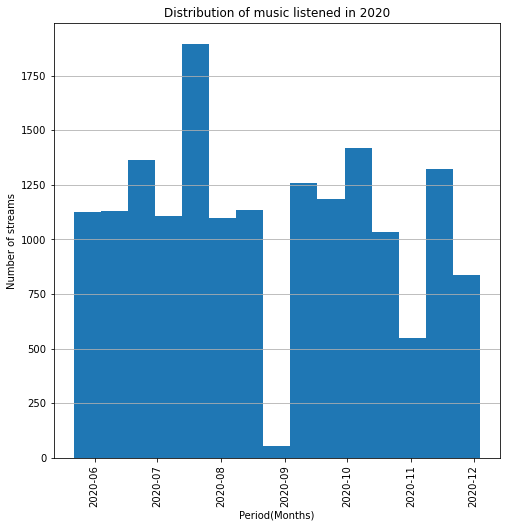

In [32]:
#visualizing the distribuition of music listened to per months (June - December) in 2020
plt.figure(figsize = (8,8))
plt.hist(data = streamingHistory_visual, x = 'date', bins = 15)
plt.xticks(rotation = 90)
plt.grid(True, axis = 'y') #(label properly)
plt.title('Distribution of music listened in 2020')
plt.ylabel('Number of streams')
plt.xlabel('Period(Months)');

From the graph, i noticed that i listened to the most songs in July; i can concluded that because it was summer, i was in a more relaxed state so i had time to listen to more music. Unlike July, September has the least amount of plays which might be due to the stress of university workload. In conclusion the less stressed I am, the more I listen to music.

In [33]:
#Seperating the days, hours and minPlayed columns from the main dataset for further analysis
days_hours = streamingHistory_visual[['hour','weekday','minPlayed']]
days_hours

,hour,weekday,minPlayed
0,16,4,2.666667
1,16,4,3.052067
2,16,4,2.939567
3,16,4,2.333333
4,16,4,2.217050
...,...,...,...
16518,22,4,2.451250
16519,22,4,4.243150
16520,23,4,3.940033
16521,23,4,4.102183


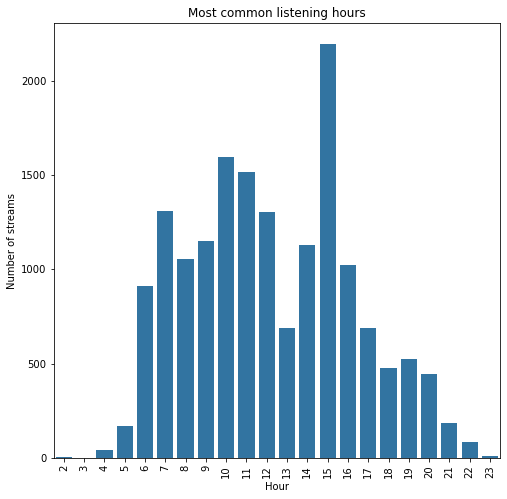

In [34]:
#Identifying the most common listening hours using a barchart 
plt.figure(figsize = (8,8))
col = sb.color_palette()[0]
sb.countplot(data = days_hours, x ='hour', color = col) 
plt.title('Most common listening hours')
plt.ylabel('Number of streams')
plt.xlabel('Hour')
plt.xticks(rotation = 90);

From the barchart,we can see that it is an unimodal distribution. I stream songs over 2000 times mostly at 15:00 hours. It also shows that i most actively listen to music during the morning and afternoon hours.

A unimodal distribution is a distribution with one clear peak or most frequent value(STAT Abuse, 2020).

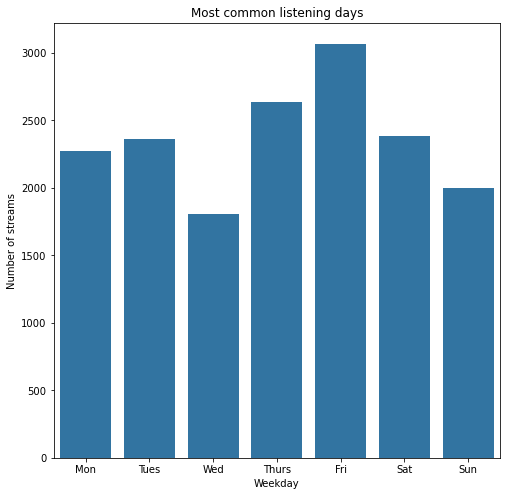

In [35]:
#Visualizing a plot graph with the most commom listening days
plt.figure(figsize = (8,8))
col = sb.color_palette()[0]
day_short_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
sb.countplot(data = days_hours, x ='weekday', color = col)
plt.xticks([0,1,2,3,4,5,6], day_short_names);
plt.title('Most common listening days')
plt.ylabel('Number of streams')
plt.xlabel('Weekday');

Friday seems to be my most common listening day with over 3000 streams. I'm mostly busy with classes on Wednesday so that might be the cause why i had the lowest streams. It is also an unimodal distribution. 

In [36]:
streamingHistory_visual['date']= pd.to_datetime(streamingHistory_visual['date'])

In [37]:
#pivoting the df and creating another one. this allows me to transform and reshape the datetime variables
##('hour','weekday','minplayed') to multi-index identifying the hours per weekday for which i listened to songs. 
## taking the minplayed as counts
data_df = pd.pivot_table(streamingHistory_visual[['hour','weekday','minPlayed']], index = ['weekday','hour'], aggfunc = 'count')

In [38]:
data_df

minPlayed
weekday hour           
0       5             2
        6           196
        7           154
        8            95
        9            83
...                 ...
6       17          111
        18           60
        19           97
        20           10
        21            1

[127 rows x 1 columns]

In [39]:
#unstacking the data to make it readable, and filling the NaN values with 0
data_df2 = data_df.unstack(level = 0)
data_df3 = data_df2.fillna(0)
data_df3

minPlayed                                          
weekday         0      1      2      3      4      5      6
hour                                                       
2             0.0    0.0    0.0    0.0    3.0    0.0    0.0
3             0.0    0.0    0.0    0.0    2.0    0.0    0.0
4             0.0    0.0    0.0    0.0   40.0    2.0    0.0
5             2.0   19.0    8.0   23.0   48.0   21.0   48.0
6           196.0  117.0  163.0  146.0  203.0   38.0   51.0
7           154.0  190.0   93.0  220.0  296.0  113.0  243.0
8            95.0  100.0   69.0  182.0  193.0  239.0  176.0
9            83.0   62.0  115.0   95.0  139.0  294.0  364.0
10          300.0  210.0  158.0  162.0  215.0  267.0  283.0
11          247.0  237.0  157.0  206.0  245.0  261.0  164.0
12          246.0  185.0  116.0  236.0  189.0  238.0   94.0
13          108.0  133.0   75.0   58.0  107.0  115.0   95.0
14          151.0  180.0  197.0  147.0  219.0  154.0   82.0
15          409.0  541.0  335.0  370.0  351.0  146.0   43.0
16          124.0  244.0  111.0  152.0  177.0  141.0   76.0
17           15.0   34.0   56.0  101.0  228.0  146.0  111.0
18           20.0   50.0   51.0   62.0  141.0   91.0   60.0
19           84.0   20.0   91.0   83.0   59.0   91.0   97.0
20           32.0   29.0   12.0  274.0   83.0    6.0   10.0
21            4.0    0.0    0.0  106.0   70.0    7.0    1.0
22            0.0    7.0    0.0   13.0   57.0   10.0    0.0
23            0.0    0.0    0.0    0.0    3.0    6.0    0.0

Plotting a heatmap to visualize the weekdays and hours that i mostly listen to Spotify. This is a better way to visualize the weekdays for which i play more songs.

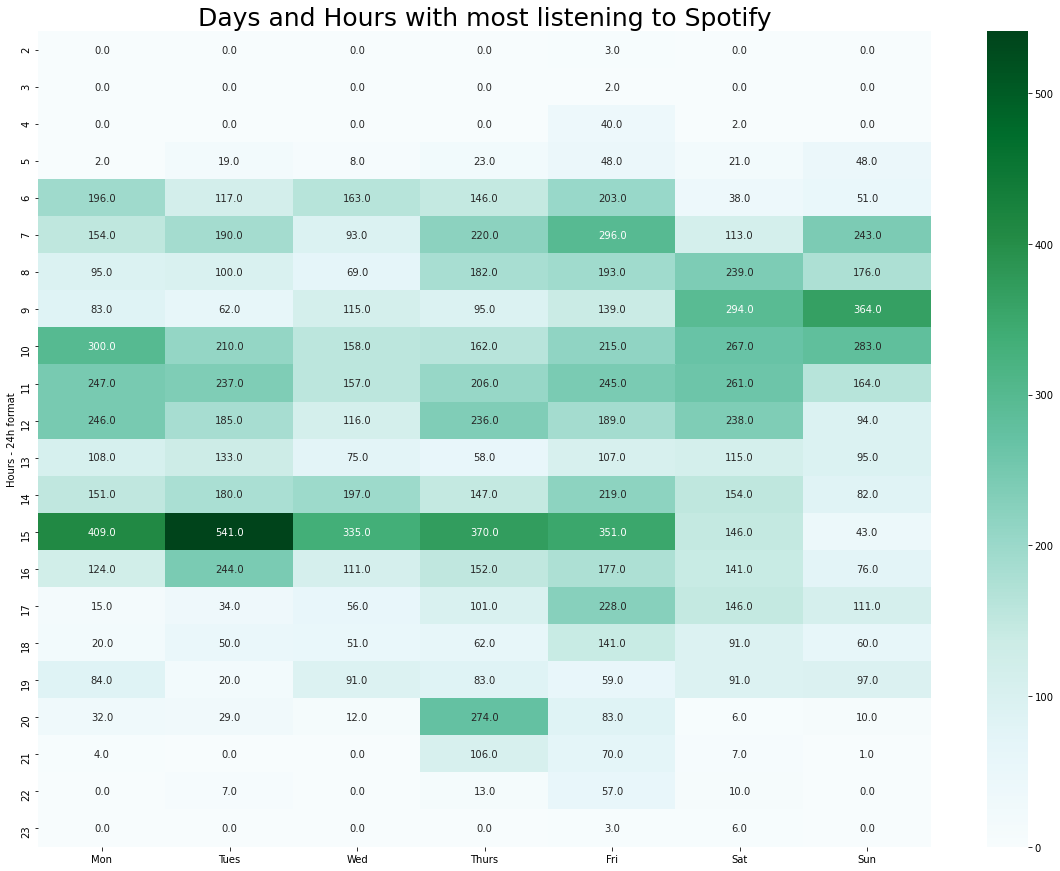

In [40]:
#plotting the heatmap with most listening hours and days
day_short_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
plt.figure(figsize = (20,15))
sb.heatmap(data = data_df3, annot = True, cmap = 'BuGn', fmt = '000', xticklabels=day_short_names)
plt.title('Days and Hours with most listening to Spotify', fontsize = 25)
plt.xlabel('')
plt.ylabel('Hours - 24h format');

 
 - From the heatmap, the day with the most listening is on Tuesday. On Tuesdays, i code a lot after class and i mostly listen to music to relax in order to concentrate.
- Wednesday has the least listening hours 
- I mostly listen to spotify at 15:00 hours
- Fidays have the most listening hours in total

## Predictions


I chose to do my analysis using a Pipeline because it ensures date integrity when doing predictions without any data leak. OneHotEncoder was used to insert dummy variables for artists' names. I also used multiple machine learning algorithms for analysis. The methods include: Random Forest Regression, Logistic Regression, Decision Tree and K-nearest neighbour. I choose Random Forest as the final analysis model because it is an ensemble technique that can be used for both classification and regression problems. It divides the training data into samples and builds a decision tree for each sample. By combining multiple decision trees, a Random Forest is able to construct a more accurate model. Though it tends to overfit the data, which might make the model to be less reliable with other data, it however outperformed the other methods.


I chose to do my analysis using a Pipeline because it ensures date integrity when doing predictions without any data leak.
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
OneHotEncoder was used to insert dummy variables (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
SimpleImputer(https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)


In [41]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
ohe =OneHotEncoder(sparse=False)
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression(solver='lbfgs')
from sklearn.ensemble import  RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [42]:
#reading allartis 
allArtists

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,California Love,1,6ayeqYtOtwVhqVB6k6MKoh,California Love,spotify:track:6ayeqYtOtwVhqVB6k6MKoh,0.03300,0.656,0.882,0.000000,0.6700,-3.011,0.0941,91.661,0.7820,56
1,California Love,2,1UDsnzBp8gUCFsrzUDlZI9,Slippin' Into Darkness,spotify:track:1UDsnzBp8gUCFsrzUDlZI9,0.04800,0.810,0.642,0.000000,0.2640,-8.647,0.2440,90.956,0.6940,39
2,California Love,3,3bKs15o7F9VP6GBExCbb6H,Ride or Die,spotify:track:3bKs15o7F9VP6GBExCbb6H,0.11300,0.548,0.590,0.000722,0.2290,-9.301,0.4750,87.841,0.2670,41
3,California Love,4,4L0iAst3yLonw8aGxTRCvb,I Ain't Mad At Cha,spotify:track:4L0iAst3yLonw8aGxTRCvb,0.05260,0.839,0.657,0.000106,0.3910,-4.959,0.2220,85.111,0.6150,40
4,California Love,5,66men3J5qFERvIY06M5hQ9,Static II,spotify:track:66men3J5qFERvIY06M5hQ9,0.00944,0.854,0.694,0.071900,0.0767,-4.258,0.1230,104.379,0.7760,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,Warm Jazz,36,7L0OpOl0dvHuvVq96aqZ0c,Bonfire,spotify:track:7L0OpOl0dvHuvVq96aqZ0c,0.88200,0.452,0.234,0.698000,0.1840,-16.419,0.0351,131.628,0.2100,18
3290,Warm Jazz,37,4DqIYAMMyFJ5SJyD4wxjtn,Like A Dream,spotify:track:4DqIYAMMyFJ5SJyD4wxjtn,0.85700,0.509,0.265,0.466000,0.1160,-15.503,0.0399,60.754,0.1550,18
3291,Warm Jazz,38,102Yc1hN6daiOvqlZtbok3,Sounds Familiar,spotify:track:102Yc1hN6daiOvqlZtbok3,0.89400,0.408,0.250,0.029500,0.1500,-17.101,0.0327,138.259,0.1080,18
3292,Warm Jazz,39,2heUpU5N2ZLzwjeIMk5Vkz,Foot Steps,spotify:track:2heUpU5N2ZLzwjeIMk5Vkz,0.79100,0.320,0.229,0.802000,0.1130,-17.382,0.0334,115.305,0.0838,18


In [43]:
streamingHistory_visual

,endTime,artistName,trackName,minPlayed,date,hour,weekday
0,2020-05-22 16:40:00,G Mills,Lilac,2.666667,2020-05-22,16,4
1,2020-05-22 16:43:00,G Mills,Haze,3.052067,2020-05-22,16,4
2,2020-05-22 16:46:00,Sleepy Fish,The Shore and You,2.939567,2020-05-22,16,4
3,2020-05-22 16:48:00,L'Indécis,keep on,2.333333,2020-05-22,16,4
4,2020-05-22 16:51:00,Ward Wills,Be Okay,2.217050,2020-05-22,16,4
...,...,...,...,...,...,...,...
16518,2020-12-04 22:53:00,Summer Walker,White Tee (with NO1-NOAH),2.451250,2020-12-04,22,4
16519,2020-12-04 22:57:00,The Fray,Never Say Never,4.243150,2020-12-04,22,4
16520,2020-12-04 23:01:00,The Fray,How to Save a Life,3.940033,2020-12-04,23,4
16521,2020-12-04 23:06:00,John Mayer,Your Body Is a Wonderland,4.102183,2020-12-04,23,4


In [44]:
## merged the all artists dataset with my streaming history to enrich my dataset
prediction=pd.merge(allArtists,streamingHistory_visual, left_on='name', right_on='trackName')
prediction

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,...,tempo,valence,popularity,endTime,artistName,trackName,minPlayed,date,hour,weekday
0,California Love,1,6ayeqYtOtwVhqVB6k6MKoh,California Love,spotify:track:6ayeqYtOtwVhqVB6k6MKoh,0.03300,0.656,0.882,0.000,0.670,...,91.661,0.782,56,2020-06-25 10:48:00,2Pac,California Love,0.941600,2020-06-25,10,3
1,California Love,6,7GVCAVH7SZnjrzHI1FmfeA,Runnin',spotify:track:7GVCAVH7SZnjrzHI1FmfeA,0.00522,0.697,0.598,0.000,0.172,...,85.862,0.387,37,2020-05-31 19:51:00,The Pharcyde,Runnin',0.069300,2020-05-31,19,6
2,California Love,6,7GVCAVH7SZnjrzHI1FmfeA,Runnin',spotify:track:7GVCAVH7SZnjrzHI1FmfeA,0.00522,0.697,0.598,0.000,0.172,...,85.862,0.387,37,2020-06-13 17:10:00,The Pharcyde,Runnin',0.035450,2020-06-13,17,5
3,California Love,6,7GVCAVH7SZnjrzHI1FmfeA,Runnin',spotify:track:7GVCAVH7SZnjrzHI1FmfeA,0.00522,0.697,0.598,0.000,0.172,...,85.862,0.387,37,2020-06-15 15:33:00,The Pharcyde,Runnin',0.026300,2020-06-15,15,0
4,California Love,6,7GVCAVH7SZnjrzHI1FmfeA,Runnin',spotify:track:7GVCAVH7SZnjrzHI1FmfeA,0.00522,0.697,0.598,0.000,0.172,...,85.862,0.387,37,2020-06-17 15:24:00,The Pharcyde,Runnin',0.046250,2020-06-17,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,Spring Cafe,5,2dcbkqAvNC1CRoydg9MoPy,Green,spotify:track:2dcbkqAvNC1CRoydg9MoPy,0.92300,0.574,0.249,0.863,0.112,...,130.344,0.224,16,2020-05-24 19:35:00,VYNK,Green,3.342583,2020-05-24,19,6
2837,Spring Cafe,5,2dcbkqAvNC1CRoydg9MoPy,Green,spotify:track:2dcbkqAvNC1CRoydg9MoPy,0.92300,0.574,0.249,0.863,0.112,...,130.344,0.224,16,2020-07-16 12:36:00,VYNK,Green,1.007833,2020-07-16,12,3
2838,Spring Cafe,5,2dcbkqAvNC1CRoydg9MoPy,Green,spotify:track:2dcbkqAvNC1CRoydg9MoPy,0.92300,0.574,0.249,0.863,0.112,...,130.344,0.224,16,2020-08-11 09:02:00,VYNK,Green,3.342583,2020-08-11,9,1
2839,Spring Cafe,5,2dcbkqAvNC1CRoydg9MoPy,Green,spotify:track:2dcbkqAvNC1CRoydg9MoPy,0.92300,0.574,0.249,0.863,0.112,...,130.344,0.224,16,2020-09-16 17:04:00,VYNK,Green,3.342583,2020-09-16,17,2


#### Weekday prediction

In [45]:
## deleting unnecessary columns from my dataset. 
cols=[0,1,2,3,4,-3,-5,-7]
prediction_weekday=prediction.drop(prediction.columns[cols], axis=1)

In [46]:
prediction_weekday

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artistName,minPlayed,hour,weekday
0,0.03300,0.656,0.882,0.000,0.670,-3.011,0.0941,91.661,0.782,56,2Pac,0.941600,10,3
1,0.00522,0.697,0.598,0.000,0.172,-9.604,0.1360,85.862,0.387,37,The Pharcyde,0.069300,19,6
2,0.00522,0.697,0.598,0.000,0.172,-9.604,0.1360,85.862,0.387,37,The Pharcyde,0.035450,17,5
3,0.00522,0.697,0.598,0.000,0.172,-9.604,0.1360,85.862,0.387,37,The Pharcyde,0.026300,15,0
4,0.00522,0.697,0.598,0.000,0.172,-9.604,0.1360,85.862,0.387,37,The Pharcyde,0.046250,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,0.92300,0.574,0.249,0.863,0.112,-14.535,0.0425,130.344,0.224,16,VYNK,3.342583,19,6
2837,0.92300,0.574,0.249,0.863,0.112,-14.535,0.0425,130.344,0.224,16,VYNK,1.007833,12,3
2838,0.92300,0.574,0.249,0.863,0.112,-14.535,0.0425,130.344,0.224,16,VYNK,3.342583,9,1
2839,0.92300,0.574,0.249,0.863,0.112,-14.535,0.0425,130.344,0.224,16,VYNK,3.342583,17,2


In [47]:
## based on my spotify playlist, Acousticness and instumentalness has a high correlation with each other, 
##in addition to loudness and enery. Loudness and Instrumentaness have an inverse correlation, in addition to popularity 
## and instrumentalness. ##The rest of the variables didn't have a significant correlation.  
corr = prediction_weekday.corr()
corr.style.background_gradient(cmap='coolwarm')

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,minPlayed,hour,weekday
acousticness,1.000000,-0.135622,-0.403918,0.501454,0.052746,-0.468517,0.012299,-0.224391,0.011782,-0.382989,0.048957,-0.014367,-0.029591
danceability,-0.135622,1.000000,0.078328,-0.267025,-0.062107,0.236526,0.177562,-0.150811,0.419586,0.267232,0.032624,0.008126,-0.009654
energy,-0.403918,0.078328,1.000000,-0.520382,0.250913,0.813061,0.266261,0.006810,0.434491,0.191296,0.019868,-0.060239,0.005338
instrumentalness,0.501454,-0.267025,-0.520382,1.000000,-0.119832,-0.695628,-0.149956,-0.077824,-0.179794,-0.518037,-0.036362,0.035974,-0.001356
liveness,0.052746,-0.062107,0.250913,-0.119832,1.000000,0.145166,0.249011,0.072958,0.057071,-0.069619,0.069305,-0.079387,-0.008597
loudness,-0.468517,0.236526,0.813061,-0.695628,0.145166,1.000000,0.237849,0.047072,0.372086,0.412920,0.066393,-0.035207,0.007583
speechiness,0.012299,0.177562,0.266261,-0.149956,0.249011,0.237849,1.000000,0.029498,0.235201,0.073123,0.038248,-0.053219,-0.008785
tempo,-0.224391,-0.150811,0.006810,-0.077824,0.072958,0.047072,0.029498,1.000000,-0.232996,0.175654,-0.056990,0.015928,0.022556
valence,0.011782,0.419586,0.434491,-0.179794,0.057071,0.372086,0.235201,-0.232996,1.000000,0.008414,0.082589,-0.029409,-0.021656
popularity,-0.382989,0.267232,0.191296,-0.518037,-0.069619,0.412920,0.073123,0.175654,0.008414,1.000000,0.006300,-0.018010,0.022430


In [48]:
## if the song is lower than 1min, i will assume i didn't want to listen to it. if more, it mean i listened to it. 

prediction_weekday['listenedTo'] = [1 if x>=0.99 else 0 for x in prediction_weekday['minPlayed']>=0.99]
prediction_weekday

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artistName,minPlayed,hour,weekday,listenedTo
0,0.03300,0.656,0.882,0.000,0.670,-3.011,0.0941,91.661,0.782,56,2Pac,0.941600,10,3,0
1,0.00522,0.697,0.598,0.000,0.172,-9.604,0.1360,85.862,0.387,37,The Pharcyde,0.069300,19,6,0
2,0.00522,0.697,0.598,0.000,0.172,-9.604,0.1360,85.862,0.387,37,The Pharcyde,0.035450,17,5,0
3,0.00522,0.697,0.598,0.000,0.172,-9.604,0.1360,85.862,0.387,37,The Pharcyde,0.026300,15,0,0
4,0.00522,0.697,0.598,0.000,0.172,-9.604,0.1360,85.862,0.387,37,The Pharcyde,0.046250,15,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,0.92300,0.574,0.249,0.863,0.112,-14.535,0.0425,130.344,0.224,16,VYNK,3.342583,19,6,1
2837,0.92300,0.574,0.249,0.863,0.112,-14.535,0.0425,130.344,0.224,16,VYNK,1.007833,12,3,1
2838,0.92300,0.574,0.249,0.863,0.112,-14.535,0.0425,130.344,0.224,16,VYNK,3.342583,9,1,1
2839,0.92300,0.574,0.249,0.863,0.112,-14.535,0.0425,130.344,0.224,16,VYNK,3.342583,17,2,1


In [49]:
## removing singers that appear once to be able to do the test_train split of data. 
prediction_weekday=prediction_weekday[prediction_weekday.duplicated('artistName', keep=False)].reset_index(drop=True)

In [50]:
## droping the y variable from the rest of the dataset. 
X=prediction_weekday.drop(['listenedTo','minPlayed'],axis=1)
X

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artistName,hour,weekday
0,0.03300,0.656,0.882,0.000,0.670,-3.011,0.0941,91.661,0.782,56,2Pac,10,3
1,0.00522,0.697,0.598,0.000,0.172,-9.604,0.1360,85.862,0.387,37,The Pharcyde,19,6
2,0.00522,0.697,0.598,0.000,0.172,-9.604,0.1360,85.862,0.387,37,The Pharcyde,17,5
3,0.00522,0.697,0.598,0.000,0.172,-9.604,0.1360,85.862,0.387,37,The Pharcyde,15,0
4,0.00522,0.697,0.598,0.000,0.172,-9.604,0.1360,85.862,0.387,37,The Pharcyde,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823,0.92300,0.574,0.249,0.863,0.112,-14.535,0.0425,130.344,0.224,16,VYNK,9,5
2824,0.92300,0.574,0.249,0.863,0.112,-14.535,0.0425,130.344,0.224,16,VYNK,19,6
2825,0.92300,0.574,0.249,0.863,0.112,-14.535,0.0425,130.344,0.224,16,VYNK,12,3
2826,0.92300,0.574,0.249,0.863,0.112,-14.535,0.0425,130.344,0.224,16,VYNK,9,1


In [51]:
## the y variable should be one dimensional. this is the one we will predict later
y=prediction_weekday['listenedTo']
y

0       0
1       0
2       0
3       0
4       0
       ..
2823    1
2824    1
2825    1
2826    1
2827    1
Name: listenedTo, Length: 2828, dtype: int64

In [52]:
## grouping the features that are numeric together and inserting them in a pipeline to be standardized. 
numeric_features = ['acousticness', 'danceability', 'energy','instrumentalness','liveness','loudness','speechiness','tempo',
                   'valence','popularity','weekday']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [53]:
## using the onehotencoder on the artistsName to change it to 0,1 array
categorical_features = ['artistName']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [54]:
## using the columnTransformer from SkLearn to run the transformations of all columns to numeric & categorigal. 
## ColumnTransformer is a new method used to be run within the pipeline.  
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [55]:
## splitting our data to Train 80% & Test 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=0)

# Evaluation

I chose to do my analysis using a Pipeline because it ensures date integrity when doing predictions without any data leak. OneHotEncoder was used to insert dummy variables and SimpleImputer(Scikit-learn)
I did Logistic regression (LogReg) in order to predict the probability of my Y variable. This is because Y(listenTo) is binary and can only predict Yes (1) or No (0). Mathematically, a logistic regression model predicts P(Y=1) as a function of X. The results from this analysis is discussed below


In [56]:
## creating the pipeline using LogRegression as a classifier and doing the preprocessing at once to insure data integrity. 
clf_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', logreg)])
## logestic regression appears to give a good standardized predection of 99%. 
clf_lr.fit(X_train, y_train)
print("model score: %.3f" % clf_lr.score(X_test, y_test))

y_pred = clf_lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))


model score: 0.629
Confusion matrix: 
 [[125 125]
 [ 85 231]]
Classification report: 
               precision    recall  f1-score   support

           0       0.60      0.50      0.54       250
           1       0.65      0.73      0.69       316

    accuracy                           0.63       566
   macro avg       0.62      0.62      0.62       566
weighted avg       0.63      0.63      0.62       566



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


I used a confusion matrix to evaluate the model because it helps us gain an insight into how correct our predictions were and how they hold up against the actual values.

0 = No i wont be listening to a particular song in my playlist

1 = Yes i will be listeing to a particular song in my playlist

The results from the LogReg shows that the model can accurately predict the songs i will be listening (1) to 65% of the time and can accurately predict the songs i wont be listening (0) to 60% of the time. The model accuracy score is 63%.

In [57]:
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(max_depth=10,random_state=3, n_estimators=150))])
## RandamForest gives as a perfect score. Which indicates overfitting of our model
clf_rf.fit(X_train, y_train)
print("model score: %.3f" % clf_rf.score(X_test, y_test))

y_pred = clf_rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
#print(classification_report(y_test, y_pred))


model score: 0.638
Confusion matrix: 
 [[129 121]
 [ 84 232]]
Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.52      0.56       250
           1       0.66      0.73      0.69       316

    accuracy                           0.64       566
   macro avg       0.63      0.63      0.63       566
weighted avg       0.63      0.64      0.63       566



The precision from the Random Forest model shows that this model can accurately predict the songs I will be listeing to 66% of the time and can also accurately predict the songs i wont be listeing to 61% of the time. The model scored an accuracy level of 64%.

From the results, the prediction model is able to predict 64% of the variance: the song I will be listening to based on the genre (audio features) of these songs; thereby answering the research question. The F1 Score of the model, 0.69 was used as a measure to balance the Precision and Recall because of uneven class distribution (a large number of Actual Negatives). Random Forest Regressor used multiple decision trees to create the model with each node in the tree trying to find the optimal split point. One of the downsides of this model is that the time parameter should be known before starting any prediction(Yui, 2019). This model can be adapted to predict song choices or most active listening days or hours.

Below are the other models which i used to predict Y(listenedTo) to get accurate scores. I choose to use the Random Forest Regression as the final prediction model because it scored a higher model score . 

In [58]:
## KNN
clf_KNN = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier(n_neighbors = 5))])
clf_KNN.fit(X_train, y_train)
print("model score: %.3f" % clf_KNN.score(X_test, y_test))

y_pred = clf_KNN.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))


model score: 0.617
Confusion matrix: 
 [[133 117]
 [100 216]]
Classification report: 
               precision    recall  f1-score   support

           0       0.57      0.53      0.55       250
           1       0.65      0.68      0.67       316

    accuracy                           0.62       566
   macro avg       0.61      0.61      0.61       566
weighted avg       0.61      0.62      0.61       566



The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms.It simply calculates the distance of a new data point to all other training data points, i choose 5 neighbors. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong. One downside of KNN algorithm is it doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features (Stack Abuse, 2020).


The precision from the KNN model shows that this model can accurately predict the songs I will be listeing to 65% of the time and can also accurately predict the songs i wont be listeing to 57% of the time. The model scored an accuracy level of 62%.

In [59]:
## SVM
clf_SVC = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(random_state=1, kernel='rbf'))])
clf_SVC.fit(X_train, y_train)
print("model score: %.3f" % clf_SVC.score(X_test, y_test))

y_pred = clf_SVC.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))


model score: 0.631
Confusion matrix: 
 [[134 116]
 [ 93 223]]
Classification report: 
               precision    recall  f1-score   support

           0       0.59      0.54      0.56       250
           1       0.66      0.71      0.68       316

    accuracy                           0.63       566
   macro avg       0.62      0.62      0.62       566
weighted avg       0.63      0.63      0.63       566



Support vector machines (SVM) is a supervised machine learning technique which is used in classification but can also be applied to regression problems. SVMs define a decision boundary along with a maximal margin that separates almost all the points into two classes while also leaving some room for misclassifications (Bento, 2020). I used this to evalute my prediction and compare its results with the other algorithms.

The precision from the SVM shows that this model can accurately predict the songs I will be listeing to 66% of the time and can also accurately predict the songs i wont be listeing to 59% of the time. The model scored an accuracy level of 63%.

In [60]:
## DecisionTree
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])
clf_dt.fit(X_train, y_train)
print("model score: %.3f" % clf_dt.score(X_test, y_test))


y_pred = clf_dt.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))


model score: 0.583
Confusion matrix: 
 [[139 111]
 [125 191]]
Classification report: 
               precision    recall  f1-score   support

           0       0.53      0.56      0.54       250
           1       0.63      0.60      0.62       316

    accuracy                           0.58       566
   macro avg       0.58      0.58      0.58       566
weighted avg       0.59      0.58      0.58       566



Decision trees are constructed via an algorithmic approach that identifies ways to split a data set based on different conditions. Decision Trees are a non-parametric supervised learning method used for both classification and regression tasks. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features (Hackerearth, 2020).
From the result the precesion show that 63% of the songs I will listen to are guesed corectly and only 53% of the songs i will not listen to are correctly guesed with an acuracy leval of 58%.

From the result, the Random Forest gives an overall better accurate prediction than the other models. It had a better model accuracy score than the rest. Although SVM had a better precision score, it scored a lower model score(63) which i why i decided to go with the Random Forest(64) as my final model.

### Testing

In [61]:
# y_hat_lr=clf_lr.predict(X)
# prediction_weekday['y_hat_lr']=y_hat_lr
# prediction_weekday

### References

Spotify. (2020). Listening is everything. Listening is everything - Spotify. https://www.spotify.com/nl/

Bento, C. (2020, July 7). Support vector machines explained with Python examples. Medium. https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85

Spotipy. (2020). Welcome to Spotipy! — spotipy 2.0 documentation. Welcome to Spotipy! — spotipy 2.0 documentation. https://spotipy.readthedocs.io/en/2.16.1/

Stack Abuse. (2021, January 21). K-nearest neighbors algorithm in Python and scikit-learn. https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

STAT Trek. (2020). Unimodal distribution: Definition. Statistics and Probability. https://stattrek.com/statistics/dictionary.aspx?definition=unimodal%20distribution

Hackerearth. (2020). Decision tree. HackerEarth. https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/ml-decision-tree/tutorial/

Yiu, T. (2019, August 14). Understanding random forest. Medium. https://towardsdatascience.com/understanding-random-forest-58381e0602d2

Scikit-learn. (n.d.). scikit-learn: machine learning in Python — scikit-learn 0.16.1 documentation. Retrieved January 20, 2021, from https://scikit-learn.org/stable/index.html